### Central Limit Theorem

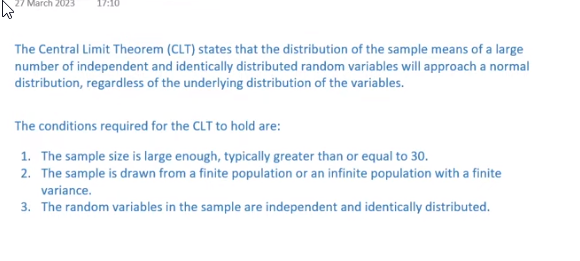

A **sample distribution** is a concept in statistics that refers to the distribution of a specific characteristic or variable within a sample of data. Let's break down this concept:

1. **Population:** In statistics, a population is the entire group of individuals or instances about whom information is sought. For example, if you're interested in studying the average income of all adults in a country, the population would be all adults in that country.

2. **Sample:** It is often not feasible to study an entire population due to time, cost, or other constraints. Instead, researchers select a subset of the population for their study, known as a sample. The sample is expected to be representative of the larger population.

3. **Variable:** A variable is any characteristic that varies among the individuals in a population. Examples include height, weight, income, etc.

4. **Sample Distribution:** When you measure a specific variable in every individual in your sample, you can create a distribution of that variable within the sample. This distribution illustrates how the values of the variable are spread out or distributed within the selected sample.

   - **Example:** If you are studying the heights of 100 adults from a population, the sample distribution of heights would show how heights are distributed within that particular sample. It might resemble a normal distribution, skewed to one side, or have other characteristics.

Understanding the sample distribution is crucial because it allows researchers to make inferences about the population based on the observed characteristics in the sample. Statistical techniques are often applied to analyze and draw conclusions about the population from the sample distribution. The sample distribution is a key concept in statistical inference, helping researchers generalize findings from a sample to a larger population.


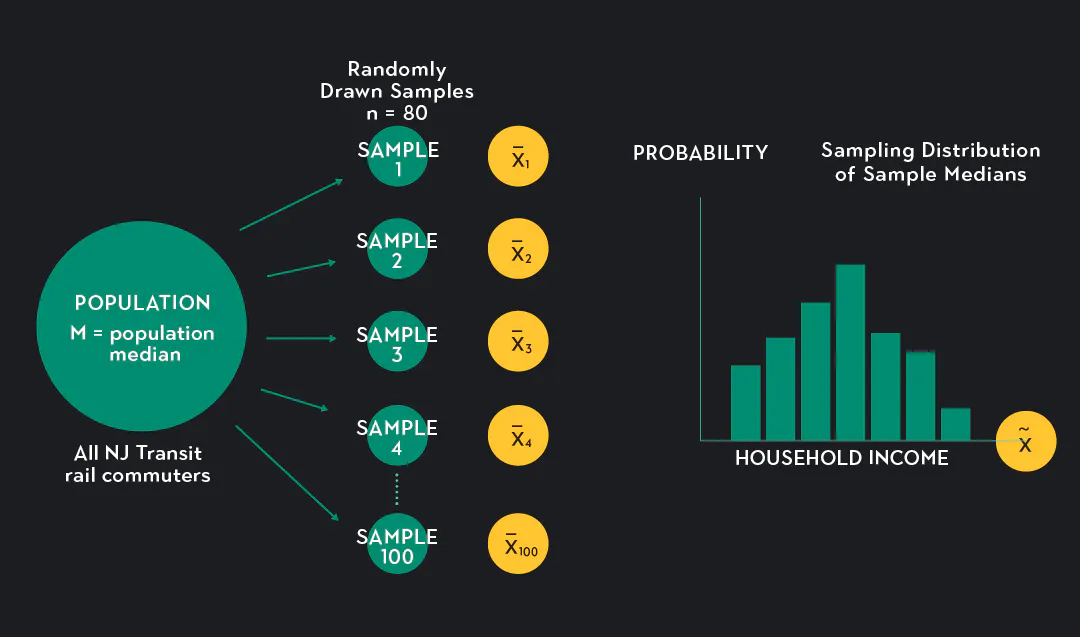

- Why Are Sampling Distributions Important?

Sampling distributions are closely linked to one of the most important tools in statistics: the central limit theorem. There is plenty to say about the central limit theorem, but in short, and for the sake of this article, it tells us two crucial things about properly drawn samples and the shape of sampling distributions:

If you draw a large enough random sample from a population, the distribution of the sample should resemble the distribution of the population. 

As the number of drawn samples gets larger and larger, and if certain conditions are met, the sampling distribution will approach a normal distribution.

#### What conditions need to be met for the central limit theorem to hold?

The central limit theorem applies in situations where the underlying data for the population is normally distributed or in cases where the size of the samples being drawn is greater than or equal to 30 (n≥30). In either case, samples need to be drawn randomly and with replacement.

Here is the magic behind sampling distributions and the central limit theorem. If we know that a sampling distribution is approximately normal, we can use the rules of probability (such as the empirical rule, z-transformations, and more) to make powerful statistical inferences. This is true even if the underlying distribution for the population is not normal or even if the shape of the underlying distribution is unknown. So long as the sample size is equal to or greater than 30, we can use the normal approximation of the sampling distribution to get a better estimate of what the underlying population is like.

If the central limit theorem holds, the sampling distribution of sample means will approach a normal distribution with a mean equal to the population mean, \( \mu \), and a standard error equal to the population standard deviation divided by the square root of the sample size, 

$$ \frac{\sigma}{\sqrt{n}} $$



The fact that the distribution of sample means is centered around the population mean is crucial. This implies that the expectation of a sample mean is the true population mean, $$ \mu $$. Using the empirical rule, we can assert that if sufficiently large samples of size  $$ n $$ are drawn with replacement, 99.7% of the sample means will fall within 3 standard errors of the population mean.


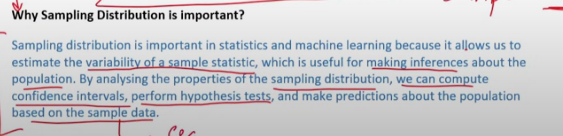

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_12876\922689797.py:59: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


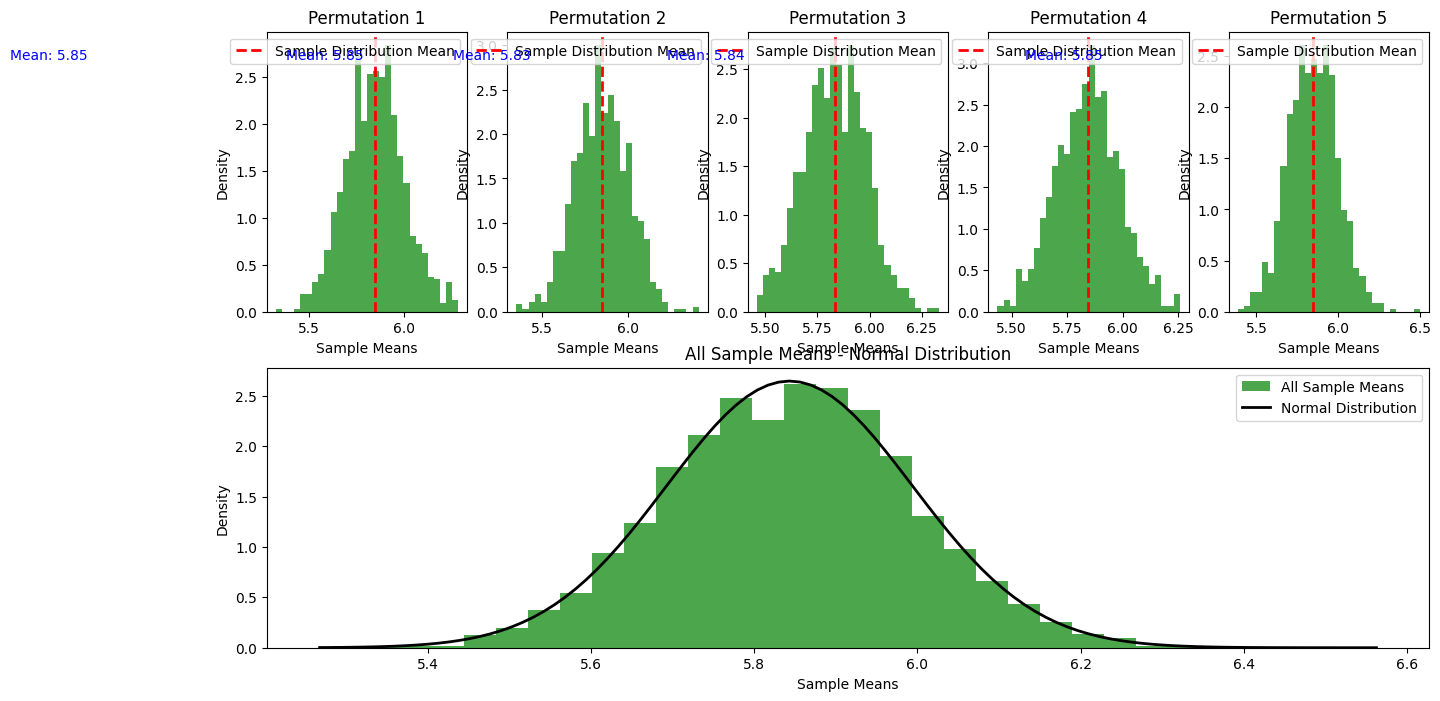

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # Import the norm function for creating normal distribution

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
sepal_length_population = iris.data[:, 0]  # Sepal length is in the first column

# Calculate the mean and standard deviation of the population
population_mean = np.mean(sepal_length_population)
population_std = np.std(sepal_length_population)

# Sample parameters
sample_size = 30
num_samples = 1000
num_permutations = 5  # Number of permutations to visualize

# Generate and plot multiple sample distribution histograms
plt.figure(figsize=(15, 8))

all_sample_means = []

for i in range(num_permutations):
    # Generate a sample distribution of means for each permutation
    sample_means = [np.mean(np.random.choice(sepal_length_population, sample_size)) for _ in range(num_samples)]
    
    # Append the sample means to the list for later use
    all_sample_means.extend(sample_means)

    # Calculate the mean of the sample distribution for each permutation
    sample_distribution_mean = np.mean(sample_means)

    # Plot the sample distribution
    plt.subplot(2, num_permutations, i + 1)
    plt.hist(sample_means, bins=30, color='green', alpha=0.7, density=True)
    plt.axvline(sample_distribution_mean, color='red', linestyle='dashed', linewidth=2, label='Sample Distribution Mean')
    plt.title(f'Permutation {i + 1}')
    plt.xlabel('Sample Means')
    plt.ylabel('Density')
    plt.legend()

    # Display the mean of the sample distribution on the plot
    plt.text(plt.xlim()[1] - 2, plt.ylim()[1] * 0.9, f'Mean: {sample_distribution_mean:.2f}', color='blue', fontsize=10, ha='right')

# Plot the normal distribution of all sample means
plt.subplot(2, 1, 2)
plt.hist(all_sample_means, bins=30, color='green', alpha=0.7, density=True, label='All Sample Means')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, population_mean, population_std/np.sqrt(sample_size))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title('All Sample Means - Normal Distribution')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


https://articles.outlier.org/understanding-sampling-distributions-what-are-they-and-how-do-they-work

#### Population Meand and sample Mean 
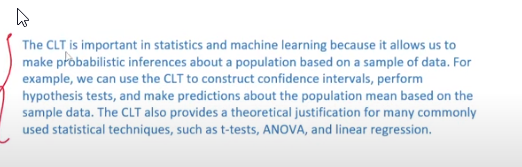

| Concept                       | Description                                                                                                                                                                                |
|-------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Population Mean $$ \mu $$      | The average value of a variable across the entire population. It is a parameter that describes the central tendency of the population.                                                        |
| Sample Distribution Mean $$ \bar{x} $$ | The average value of a variable calculated from a sample drawn from the population. It serves as a statistic, providing an estimate of the population mean.                               |
| Expected Value Relationship    | Mathematically, the expected value of the sample mean $$ E(\bar{x}) $$ is equal to the population mean $$ \mu $$: $$ E(\bar{x}) = \mu $$. This implies that, on average, if multiple samples are drawn from the population, the mean of those sample means $$ \bar{x} $$ will be equal to the population mean $$ \mu $$. This relationship is fundamental to statistical theory and is associated with the Central Limit Theorem, which states that as the sample size increases, the distribution of the sample mean approaches a normal distribution centered around the population mean. |


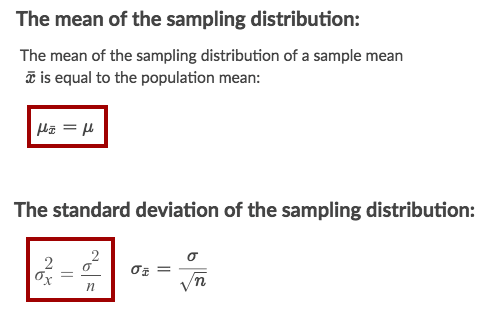

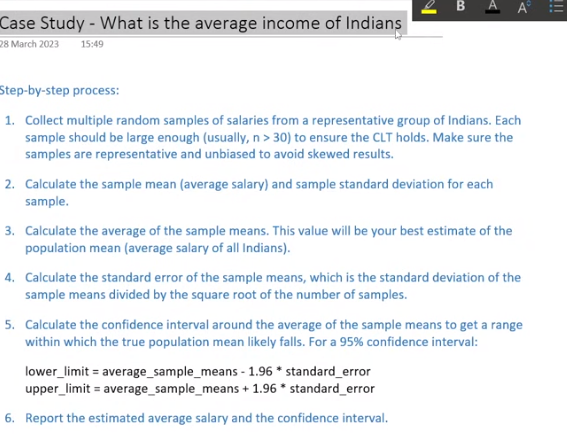

## Confidence interval

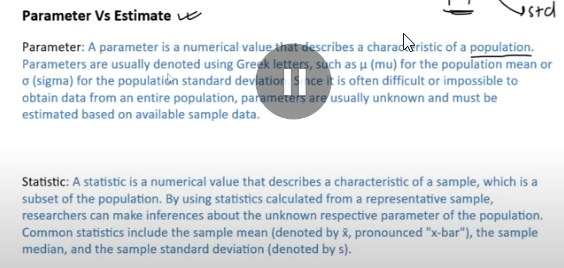

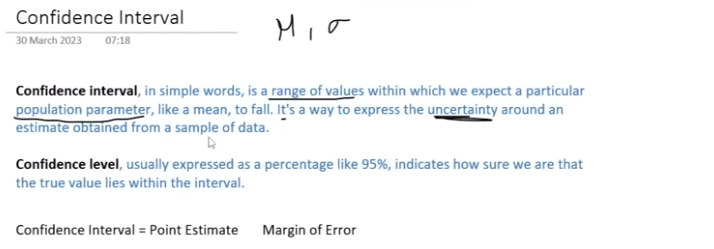

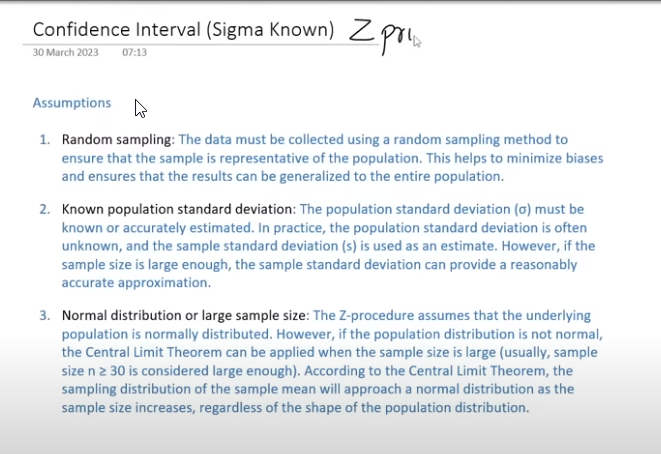

##### Example



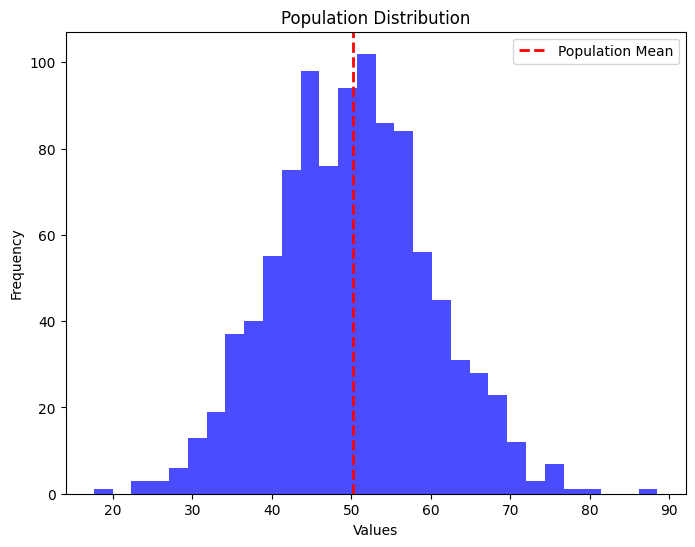

Population Mean: 50.193320558223256


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a small dataset (replace this with your own dataset)
np.random.seed(42)
population_data = np.random.normal(loc=50, scale=10, size=1000)

# Calculate the population mean
population_mean = np.mean(population_data)

# Plot the population distribution
plt.figure(figsize=(8, 6))
plt.hist(population_data, bins=30, color='blue', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Population Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Population Mean: {population_mean}")


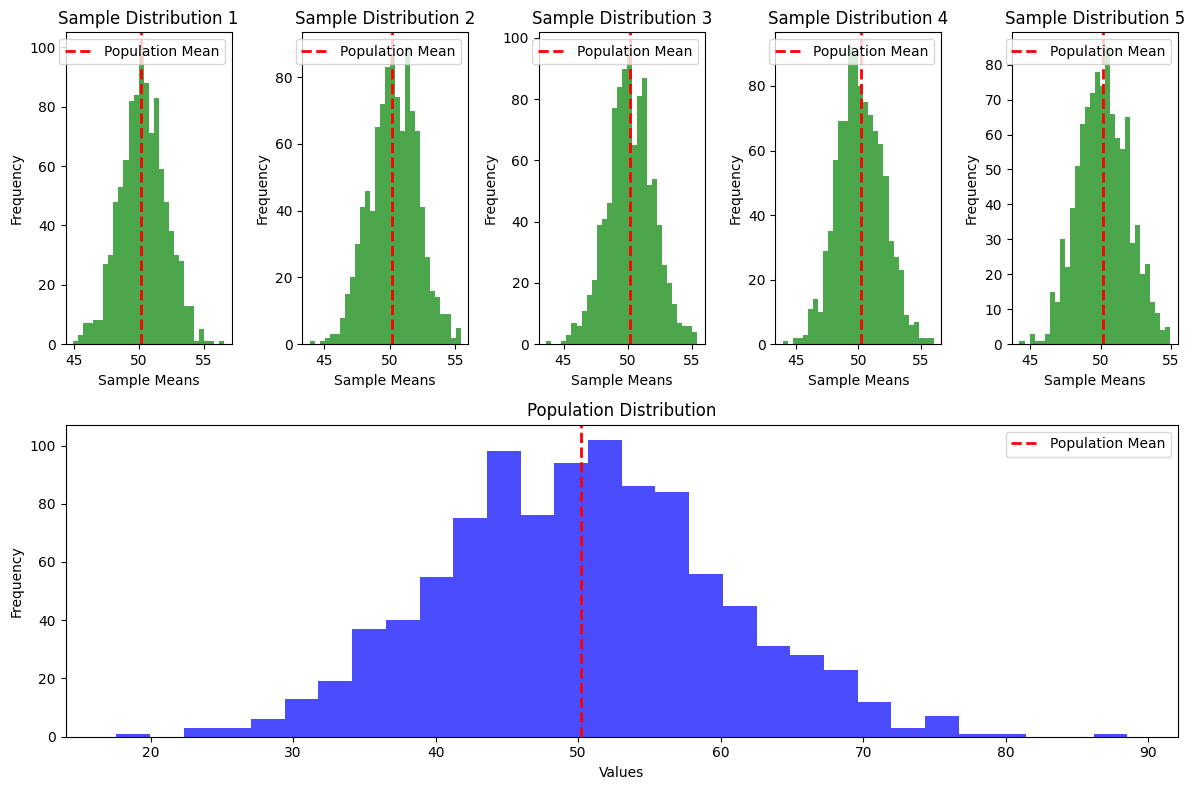

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a small dataset (replace this with your own dataset)
np.random.seed(42)
population_data = np.random.normal(loc=50, scale=10, size=1000)

# Sample parameters
sample_size = 30
num_samples = 5  # Number of sample distributions to plot
num_samples_per_distribution = 1000  # Number of samples per distribution

# Plot multiple sample distributions
plt.figure(figsize=(12, 8))

for i in range(num_samples):
    # Generate a sample distribution
    sample_distribution = np.random.choice(population_data, (num_samples_per_distribution, sample_size))
    
    # Calculate the means of each sample in the distribution
    sample_means = np.mean(sample_distribution, axis=1)
    
    # Plot the sample distribution
    plt.subplot(2, num_samples, i + 1)
    plt.hist(sample_means, bins=30, color='green', alpha=0.7)
    plt.axvline(np.mean(population_data), color='red', linestyle='dashed', linewidth=2, label='Population Mean')
    plt.title(f'Sample Distribution {i + 1}')
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')
    plt.legend()

# Plot the population distribution
plt.subplot(2, 1, 2)
plt.hist(population_data, bins=30, color='blue', alpha=0.7)
plt.axvline(np.mean(population_data), color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Population Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


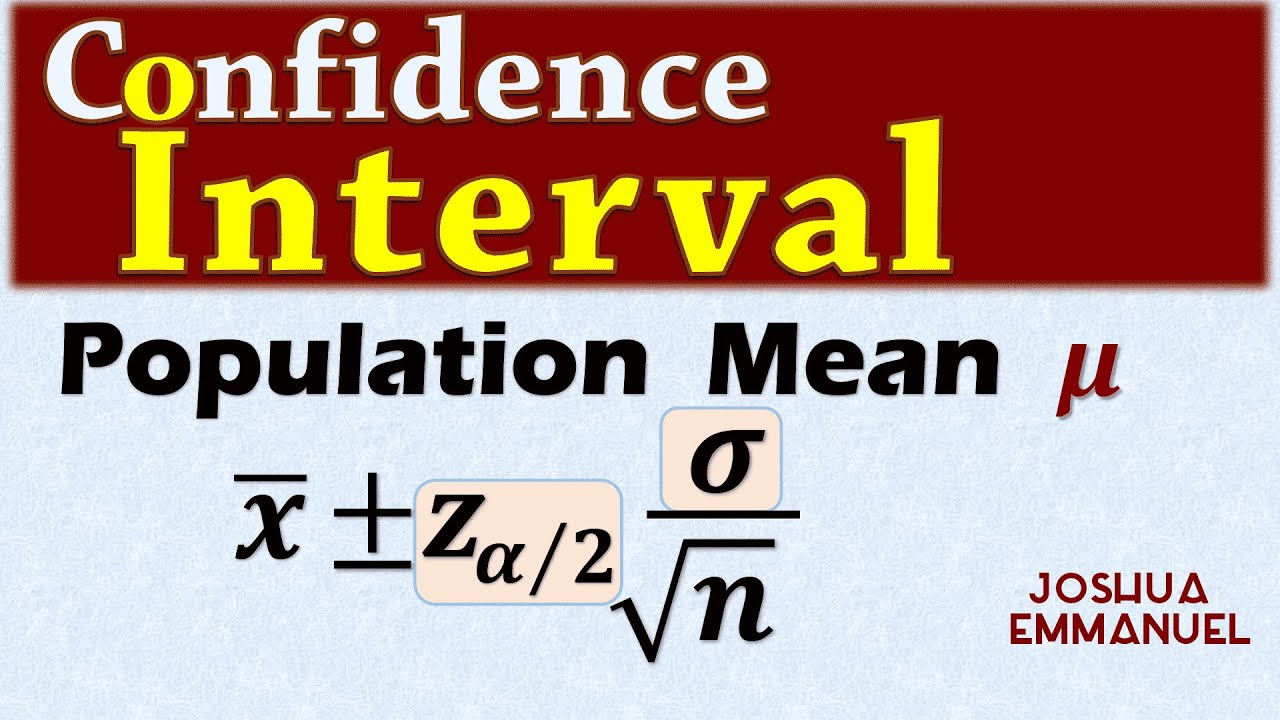

## Confidence Interval

A confidence interval is a statistical concept used to estimate the range within which we expect a population parameter to lie with a certain level of confidence. Specifically, for estimating the population mean (\( \mu \)) based on a sample, a confidence interval is calculated to provide a range of values.

### Formula

The general formula for a confidence interval for the population mean (\( \mu \)) is:

$$ \bar{x} \pm z \times \frac{s}{\sqrt{n}} $$

where:
- $ \bar{x} $ is the sample mean,
- $ z $ is the critical value from the standard normal distribution, corresponding to the desired confidence level,
- $ s $ is the sample standard deviation,
- $ n $ is the sample size.


For example, for a 95% confidence interval, \( z \) is typically 1.96.

### Interpretation

A 95% confidence interval implies that if we were to take many samples and construct a confidence interval for each, we would expect about 95% of those intervals to contain the true population mean (\( \mu \)).

### Example in LaTeX

The formula for a 95% confidence interval for the population mean is expressed in LaTeX as:

$$ \bar{x} \pm 1.96 \times \frac{s}{\sqrt{n}} $$

This LaTeX expression can be used in documents and presentations that support LaTeX typesetting.


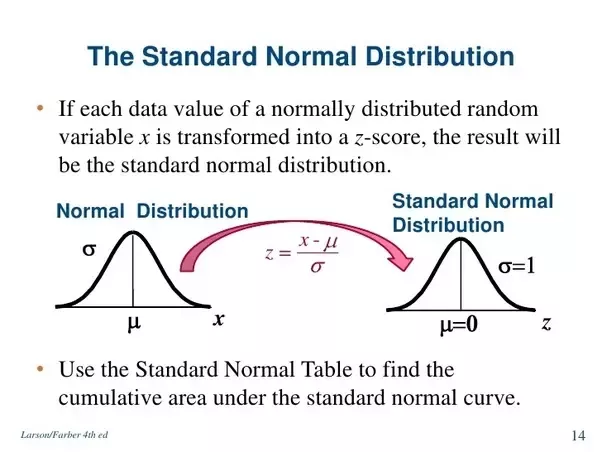

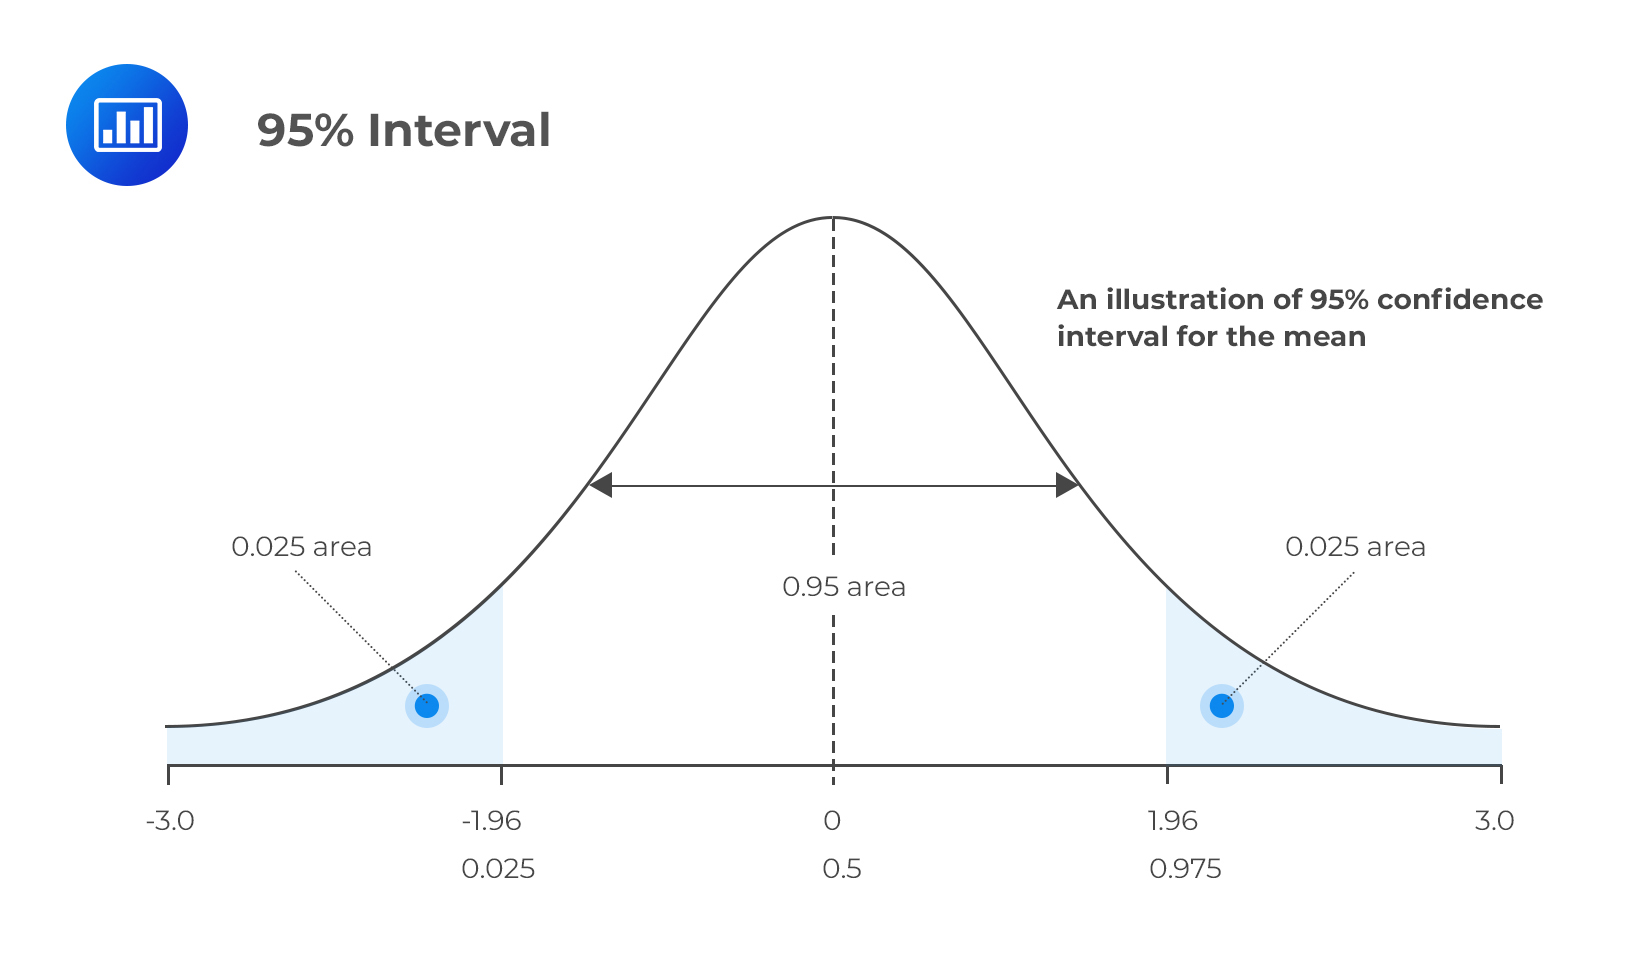

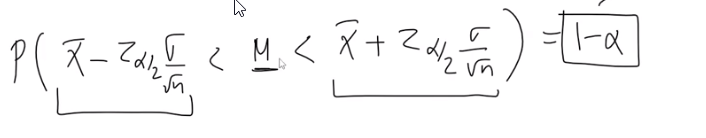

 $$ \mu $$ 
 - is the fixed quantity 

 MU is not Probaility

 When constructing a confidence interval for the population mean, the interval is a range of values calculated from a sample that is likely to contain the true population mean.
 
  The level of confidence associated with the interval (e.g., 95% confidence interval) refers to the long-term success rate of the procedure used to construct the interval. It does not represent a probability that the true parameter lies within the interval for the particular sample at hand.

Above equation does no signify probality of mean ( \mu)

To be more specific:

Confidence Interval Interpretation: A 95% confidence interval means that if we were to take many samples from the population and calculate a confidence interval for each sample, approximately 95% of those intervals would contain the true population mean.

Not a Probability Statement for the Current Interval: It's important to note that the confidence level does not represent a probability that a specific interval calculated from a given sample contains the true mean. Once a sample has been taken, the true population mean is either within the calculated interval or not; the confidence level pertains to the long-term performance of the method across repeated sampling.



In summary, a confidence interval provides a range of values that is likely to contain the true population mean, and the confidence level is a measure of the reliability of the procedure used to construct the interval across many hypothetical samples. It doesn't assign a probability to the specific interval obtained from a single sample.

MU is not varing as it is the mean of the population data which will be constant , but sample mean may change depending on the sample dat aselcted from th epopulation and hence the range in the variation of the mean , 



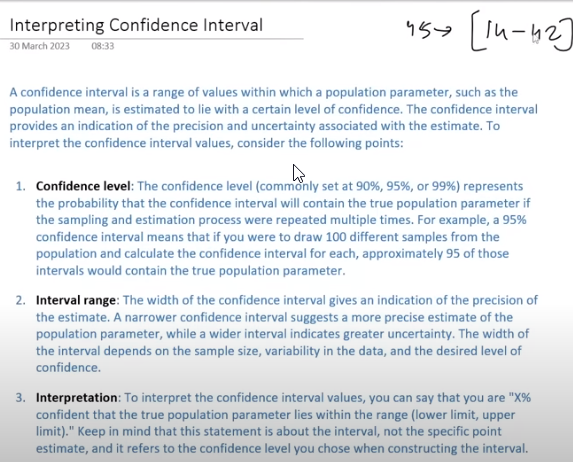